---
# **Sentiment Analysis**: Sentiment Analysis on GameSphere Game Reviews
---
## **Problem Statement**:


- GameSphere, a premier digital distribution platform for video games, stands at the forefront of the gaming industry by bridging a global community of gamers.
- It hosts a vast collection of games, encouraging users to leave reviews and share recommendations within the community.
- These reviews are crucial for feedback to developers and guide potential buyers in their decisions.
- Automatically analyzing and classifying the sentiment of these reviews as positive (recommended) or negative (not recommended) can offer invaluable insights into a game's acceptance and its overall standing among users.

## **Aim**:
- The main objective of this project is to build a smart model that can correctly figure out what a review is saying about a game on GameSphere.
- The model will look at the review text and other game info to decide if a review recommends the game. Moreover, the model will calculate **how likely a review is to be positive**.
- This detailed approach helps GameSphere better understand and organize game reviews from the internet, giving a clearer view of how popular and well-received games are.
- By doing this, we're not just seeing if people like a game but how much they like it, making our analysis more precise.


## **Dataset Attributes**:


- **review_id**: A unique identifier for each review, used to distinguish between different reviews.
- **title**: The name of the game that the review is about.
- **developer**: The name of the company or individual who developed the game.
- **publisher**: The name of the company that published the game, making it available to the public.
- **tags**: A list of categories or genres associated with the game, such as 'Free to Play', 'Strategy', 'Multiplayer', etc., which give a general idea of the game's nature.
- **overview**: A brief description or summary of the game, providing insight into its content or storyline.
- **year**: The year in which the game was released, indicating its age.
- **user_review**: The actual text of the user's review, where the reviewer shares their thoughts and opinions about the game.
- **sentiment**: Indicates the reviewer's overall sentiment towards the game, categorized as 'Positive' or 'Negative'.

- **PositiveSentimentProbability**: This is the target variable and it represents the probability that a game review expresses a positive sentiment towards the game. A probability closer to 0 indicates that the sentiment will be negative and a probability closer to 1 indicates a positive sentiment.

 **PositiveSentimentProbability** variable is not in the dataset. You simply have to predict the probability of the positive class (Using your best chosen model).



---
# **Load dataset**
---

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import sklearn
# Import other modules as per your convenience

In [2]:
# Load the dataset
import pandas as pd
df = pd.read_csv("data/train.csv")
df

,review_id,title,developer,publisher,tags,overview,year,user_review,sentiment
0,4848,SMITE®,Titan Forge Games,Hi-Rez Studios,"['Free to Play', 'MOBA', 'Multiplayer', 'Actio...",Enter the Battleground of the GodsJoin the mil...,2016.0,"I've played this game since before beta ended,...",Positive
1,15427,Business Tour - Board Game with Online Multipl...,Creobit,8Floor,"['Free to Play', 'Board Game', 'Strategy', 'Ma...","""Business Tour"" simple and entertaining gamepl...",2018.0,"fun little game , but you really need to put a...",Positive
2,8236,Neverwinter,Cryptic Studios,Perfect World Entertainment,"['Free to Play', 'MMORPG', 'RPG', 'Massively M...",,2014.0,First of all this is not a pay to win game. ZE...,Positive
3,3805,Team Fortress 2,Valve,Valve,"['Free to Play', 'Multiplayer', 'FPS', 'Action...","""The most fun you can have online"" - PC GamerI...",2014.0,this game have all very funny and tactical...,Positive
4,17261,School of Dragons,"JumpStart Games, Inc.","JumpStart Games, Inc.","['Free to Play', 'Dragons', 'Adventure', 'Mult...",**Changewing Dragon now Available**Fly Fast. T...,2017.0,"This is a great game, it really is. I understa...",Positive
...,...,...,...,...,...,...,...,...,...
17314,12056,Bless Online,NEOWIZ BLESS STUDIO,NEOWIZ,"['MMORPG', 'Open World', 'Massively Multiplaye...",“We invite you all to the world of Bless Onlin...,2018.0,Played for roughly 2 hours. The best part of ...,Negative
17315,15441,Business Tour - Board Game with Online Multipl...,Creobit,8Floor,"['Free to Play', 'Board Game', 'Strategy', 'Ma...","""Business Tour"" simple and entertaining gamepl...",2017.0,Note:Make sure you have friends. That's all.My...,Positive
17316,3699,Team Fortress 2,Valve,Valve,"['Free to Play', 'Multiplayer', 'FPS', 'Action...","""The most fun you can have online"" - PC GamerI...",2016.0,"Special, funny, lucky, friendly, exciting, hea...",Positive
17317,5275,Brawlhalla,Blue Mammoth Games,Ubisoft,"['Free to Play', 'Multiplayer', 'Fighting', '2...",Brawlhalla: An eternal battle arena where the ...,2018.0,"Product received for freeThis is a free, frien...",Positive


## Data Analysis
Summarize the data:
- How much data is present?
- What attributes/features are continuous valued?
- Which attributes are categorical?
- Which attributes have a lot of text?
- Explain noticeable traits for key attributes. Check distribution of the sentiment attribute.
- Are there any attributes that might require special treatment? If so, what special treatment might they require?
- Analyze and discuss the relationships between the data attributes, and between the data attributes and label.
- Analyze the relationship between all the features. Use appropriate visualization techniques.
- If there is a lot of textual information, how much count certain text-heavy attributes have.
- Try using word-clouds to analyze text data.

In [3]:
print("Number of rows:", len(df))
print("Number of columns:", len(df.columns))

Number of rows: 17319
Number of columns: 9


In [4]:
print("Data types of attributes:")
print(df.dtypes)

Data types of attributes:
review_id        int64
title           object
developer       object
publisher       object
tags            object
overview        object
year           float64
user_review     object
sentiment       object
dtype: object


#### Continuous attributes usually have types like int64 or float64, while categorical attributes have types like object or category.

In [5]:
print("Number of unique values in each attribute:")
print(df.nunique())

Number of unique values in each attribute:
review_id      17319
title             44
developer         42
publisher         40
tags              44
overview          43
year               8
user_review    17315
sentiment          2
dtype: int64


In [6]:
print("Sentiment distribution:")
print(df['sentiment'].value_counts())

Sentiment distribution:
Positive    9868
Negative    7451
Name: sentiment, dtype: int64


#### Text-heavy attributes like user_review, tags, and overview may require special treatment, such as text preprocessing (tokenization, removing stop words, stemming/lemmatization) and feature extraction techniques like bag-of-words, TF-IDF, or word embeddings.

Analyzing and discussing the relationships between data attributes and the label:

To analyze the relationships between data attributes and the label (sentiment), we can use various techniques depending on the nature of the attributes. Here are a few approaches:

For categorical attributes like title, developer, publisher, and tags, we can create contingency tables or pivot tables to examine the distribution of sentiment labels across different categories. This will help us identify if certain categories are more associated with positive or negative sentiments.

For numerical attributes like year, you can calculate summary statistics (mean, median, standard deviation) for each sentiment label and compare them. we can also create box plots or violin plots to visualize the distribution of the numeric attribute across different sentiment labels. This will help us understand if there are any significant differences in the numeric attribute values between positive and negative sentiments.

For text attributes like user_review and overview, we can perform text analysis techniques such as sentiment analysis, topic modeling, or word frequency analysis. This will help us identify key words, phrases, or topics that are associated with positive or negative sentiments.


Visualization of relationships between all features:


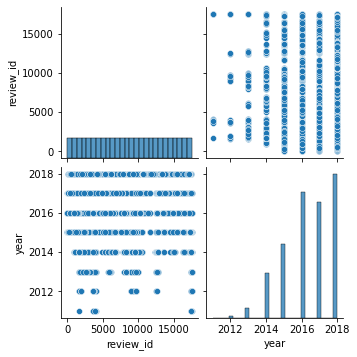

In [8]:
# Analyze relationships between all features using appropriate visualization techniques
import seaborn as sns
import matplotlib.pyplot as plt

print("\nVisualization of relationships between all features:")
sns.pairplot(df)
plt.show()


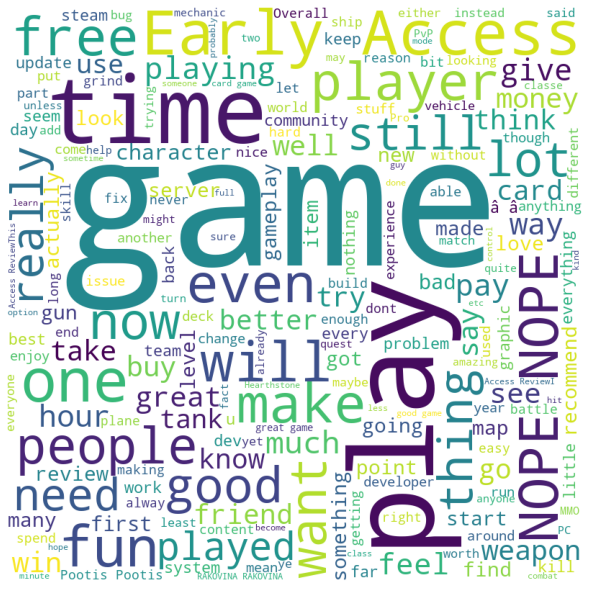

In [9]:
from wordcloud import WordCloud

# Combine all user reviews into a single string
text = ' '.join(df['user_review'])

# Create and plot the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(text)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [10]:
contingency_table = pd.crosstab(df['developer'], df['sentiment'])
print("Contingency table:")
print(contingency_table)

from scipy.stats import chi2_contingency
chi2, p_value, _, _ = chi2_contingency(contingency_table)
print("Chi-square test p-value:", p_value)

Contingency table:
sentiment                             Negative  Positive
developer                                               
Artix Entertainment, LLC                   222       295
Aurora Studio                               52       362
Bethesda Game Studios                      176       268
Blue Mammoth Games                          55       348
Camex Games                                  4        34
Cloudcade, Inc.                              7        45
Codename Entertainment Inc.                 55        76
Creobit                                     99        92
Cryptic Studios                            232       307
Darkflow Software                          248       149
Daybreak Game Company                       51       481
Dire Wolf Digital                          295       491
Divine Games                                21       131
Eagle Dynamics SA                           93       391
Edge Case Games Ltd.                        29       682
Expansive Wo

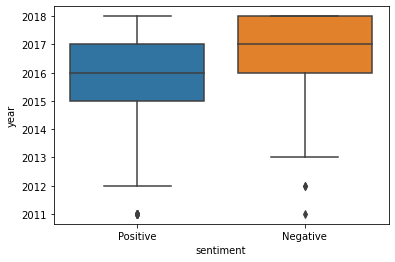

In [11]:
sns.boxplot(x='sentiment', y='year', data=df)
plt.show()

##  Data Pre-processing & Feature Engineering
- Discuss the steps you would take to clean and prepare the data for modeling. Justify why each step is necessary.
- Perform Feature Engineering on the dataset. Since this is a text-heavy dataset, to tokenize and pre-process the text data.

- Check for any null values or duplicate rows in the dataset and perform necessary actions. Also, encoding categorical columns properly.
- Primary goal is to analyze reviews to predict sentiment. Such data requires a lot of pre-processing.
- start with using **regular expressions** to remove **links**, **HTML tags**, **unnecessary punctuation**, **emojis** (if any), etc.
- remove **stopwords** with very high or very low frequency across the reviews.
- perform some advance techniques like **stemming** or **lemmatization** to further remove reduncancies.
- For feature engineering, use other techniques such as "**counter vectorization**" and "**tf-idf vectorization**" before modeling.

Handling missing values:

Check for missing values in each attribute using df.isnull().sum().
Decide on an appropriate strategy to handle missing values, such as removing rows with missing values or imputing them based on the attribute's characteristics.

Justify: Missing values can affect the quality of the model, so it's important to handle them appropriately to ensure data integrity.

In [13]:
df.isnull().sum()

review_id        0
title            0
developer        0
publisher        0
tags             0
overview         0
year           178
user_review      0
sentiment        0
dtype: int64

Removing duplicate rows:

Check for duplicate rows using df.duplicated().
Remove duplicate rows using df.drop_duplicates().

Justify: Duplicate rows can introduce bias and affect the model's performance, so removing them helps maintain data quality.

In [14]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
17314    False
17315    False
17316    False
17317    False
17318    False
Length: 17319, dtype: bool

In [15]:
df.drop_duplicates()

,review_id,title,developer,publisher,tags,overview,year,user_review,sentiment
0,4848,SMITE®,Titan Forge Games,Hi-Rez Studios,"['Free to Play', 'MOBA', 'Multiplayer', 'Actio...",Enter the Battleground of the GodsJoin the mil...,2016.0,"I've played this game since before beta ended,...",Positive
1,15427,Business Tour - Board Game with Online Multipl...,Creobit,8Floor,"['Free to Play', 'Board Game', 'Strategy', 'Ma...","""Business Tour"" simple and entertaining gamepl...",2018.0,"fun little game , but you really need to put a...",Positive
2,8236,Neverwinter,Cryptic Studios,Perfect World Entertainment,"['Free to Play', 'MMORPG', 'RPG', 'Massively M...",,2014.0,First of all this is not a pay to win game. ZE...,Positive
3,3805,Team Fortress 2,Valve,Valve,"['Free to Play', 'Multiplayer', 'FPS', 'Action...","""The most fun you can have online"" - PC GamerI...",2014.0,this game have all very funny and tactical...,Positive
4,17261,School of Dragons,"JumpStart Games, Inc.","JumpStart Games, Inc.","['Free to Play', 'Dragons', 'Adventure', 'Mult...",**Changewing Dragon now Available**Fly Fast. T...,2017.0,"This is a great game, it really is. I understa...",Positive
...,...,...,...,...,...,...,...,...,...
17314,12056,Bless Online,NEOWIZ BLESS STUDIO,NEOWIZ,"['MMORPG', 'Open World', 'Massively Multiplaye...",“We invite you all to the world of Bless Onlin...,2018.0,Played for roughly 2 hours. The best part of ...,Negative
17315,15441,Business Tour - Board Game with Online Multipl...,Creobit,8Floor,"['Free to Play', 'Board Game', 'Strategy', 'Ma...","""Business Tour"" simple and entertaining gamepl...",2017.0,Note:Make sure you have friends. That's all.My...,Positive
17316,3699,Team Fortress 2,Valve,Valve,"['Free to Play', 'Multiplayer', 'FPS', 'Action...","""The most fun you can have online"" - PC GamerI...",2016.0,"Special, funny, lucky, friendly, exciting, hea...",Positive
17317,5275,Brawlhalla,Blue Mammoth Games,Ubisoft,"['Free to Play', 'Multiplayer', 'Fighting', '2...",Brawlhalla: An eternal battle arena where the ...,2018.0,"Product received for freeThis is a free, frien...",Positive


In [16]:
missing_years = df['year'].isnull().sum()
print("Number of missing values in 'year':", missing_years)
print("Percentage of missing values in 'year':", missing_years / len(df) * 100)

Number of missing values in 'year': 178
Percentage of missing values in 'year': 1.0277729661065882


In [17]:
df = df.dropna(subset=['year'])

In [18]:
df.isnull().sum()

review_id      0
title          0
developer      0
publisher      0
tags           0
overview       0
year           0
user_review    0
sentiment      0
dtype: int64

In [42]:
import warnings
warnings.filterwarnings('ignore')


Text Preprocessing:

Removing links and HTML tags:

Use regular expressions to remove links and HTML tags from the user_review attribute.

Justify: Links and HTML tags do not provide relevant information for sentiment analysis and can introduce noise in the text data.

In [43]:
df['user_review'] = df['user_review'].str.replace(r'http\S+|www\S+', '', case=False)
df['user_review'] = df['user_review'].str.replace(r'<.*?>', '', case=False)

Removing unnecessary punctuation and emojis:

Use regular expressions to remove unnecessary punctuation and emojis from the user_review attribute.

Justify: Punctuation and emojis may not contribute significantly to sentiment analysis and can be removed to simplify the text data.

In [44]:
df['user_review'] = df['user_review'].str.replace(r'[^\w\s]', '')
df['user_review'] = df['user_review'].str.replace(r'[\U0001F600-\U0001F64F]', '')

Removing stopwords:

Use a predefined list of stopwords (e.g., from NLTK) to remove common words with high or low frequency across the reviews.

Justify: Stopwords are common words that do not carry much meaning and can be removed to focus on more informative words.

In [45]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
df['user_review'] = df['user_review'].apply(lambda x: ' '.join(word for word in x.split() if word.lower() not in stop_words))

Stemming or Lemmatization:

Apply stemming or lemmatization techniques to reduce words to their base or dictionary form.

Justify: Stemming or lemmatization helps reduce word variations and standardizes the text data, making it more suitable for analysis.

In [46]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
df['user_review'] = df['user_review'].apply(lambda x: ' '.join(stemmer.stem(word) for word in x.split()))
# or
df['user_review'] = df['user_review'].apply(lambda x: ' '.join(lemmatizer.lemmatize(word) for word in x.split()))

Feature Engineering:

Count Vectorization:

Convert the preprocessed user_review text into a matrix of token counts using CountVectorizer from scikit-learn.

Justify: Count vectorization represents the text data as a matrix of word frequencies, enabling the model to learn from the occurrence of words in the reviews.

In [47]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
review_counts = vectorizer.fit_transform(df['user_review'])

TF-IDF Vectorization

Justify: TF-IDF vectorization assigns weights to words based on their importance in the reviews, giving more emphasis to rare and informative words.

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
review_tfidf = vectorizer.fit_transform(df['user_review'])

For Attributes Tag's & overview Performing the similar procedure

In [49]:
df['tags'] = df['tags'].str.replace(r'http\S+|www\S+', '', case=False)
df['tags'] = df['tags'].str.replace(r'<.*?>', '', case=False)
df['overview'] = df['overview'].str.replace(r'http\S+|www\S+', '', case=False)
df['overview'] = df['overview'].str.replace(r'<.*?>', '', case=False)

In [50]:
df['tags'] = df['tags'].str.replace(r'[^\w\s]', '')
df['tags'] = df['tags'].str.replace(r'[\U0001F600-\U0001F64F]', '')
df['overview'] = df['overview'].str.replace(r'[^\w\s]', '')
df['overview'] = df['overview'].str.replace(r'[\U0001F600-\U0001F64F]', '')

In [51]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
df['tags'] = df['tags'].apply(lambda x: ' '.join(word for word in x.split() if word.lower() not in stop_words))
df['overview'] = df['overview'].apply(lambda x: ' '.join(word for word in x.split() if word.lower() not in stop_words))

In [52]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
df['tags'] = df['tags'].apply(lambda x: ' '.join(stemmer.stem(word) for word in x.split()))
df['overview'] = df['overview'].apply(lambda x: ' '.join(stemmer.stem(word) for word in x.split()))
# or
df['tags'] = df['tags'].apply(lambda x: ' '.join(lemmatizer.lemmatize(word) for word in x.split()))
df['overview'] = df['overview'].apply(lambda x: ' '.join(lemmatizer.lemmatize(word) for word in x.split()))

In [53]:
from sklearn.feature_extraction.text import CountVectorizer
tags_vectorizer = CountVectorizer()
tags_counts = tags_vectorizer.fit_transform(df['tags'])
overview_vectorizer = CountVectorizer()
overview_counts = overview_vectorizer.fit_transform(df['overview'])

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer
tags_vectorizer = TfidfVectorizer()
tags_tfidf = tags_vectorizer.fit_transform(df['tags'])
overview_vectorizer = TfidfVectorizer()
overview_tfidf = overview_vectorizer.fit_transform(df['overview'])

In [56]:
from sklearn.exceptions import ConvergenceWarning

# Suppress specific warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)


## Modeling

- train a **Logistic Regression Classifier** along with atleast two other classifiers of your choice and optimize their hyperparameters (Hint: Using GridsearchCV) to enhance performance.
- Implementing a validation pipeline utilizing 5-fold cross-validation.
- For each classifier, report **F1 score**, **Precision**, **Recall**, **Accuracy**, **ROC-AUC**, and **Cross-validation** score).
- Also, for each model, **plot the ROC-AUC curve**.
- Describe and discuss your findings.

## Logistic regression Model

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best hyperparameters for Logistic Regression: {'clf__C': 10, 'clf__penalty': 'l2'}
F1 score: 0.8892
Precision: 0.8885
Recall: 0.8898
Accuracy: 0.8720
ROC-AUC: 0.9452
Cross-validation scores:
 fit_time: 2.2072 (+/- 0.1368)
 score_time: 0.2535 (+/- 0.0097)
 test_f1: 0.8748 (+/- 0.0067)
 test_precision: 0.8669 (+/- 0.0148)
 test_recall: 0.8831 (+/- 0.0153)
 test_accuracy: 0.8561 (+/- 0.0080)
 test_roc_auc: 0.9342 (+/- 0.0033)


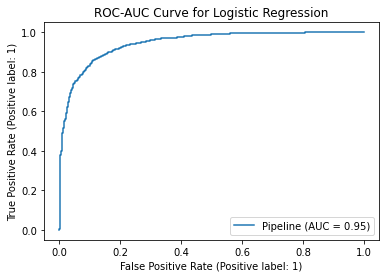

In [59]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, roc_auc_score, roc_curve, plot_roc_curve
from sklearn.preprocessing import StandardScaler
# Assuming your DataFrame is named 'df'
X = df.drop(['sentiment'], axis=1)
y = df['sentiment']

# Perform label encoding on the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the categorical columns to be encoded
categorical_cols = ['title', 'developer', 'publisher', 'tags']

# Define the numerical columns to be standardized
numerical_cols = ['year']

# Create a ColumnTransformer for encoding categorical columns and text feature extraction
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', StandardScaler(), numerical_cols),
        ('text', TfidfVectorizer(), 'user_review')
    ])

# Create a pipeline for preprocessing and modeling
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('clf', LogisticRegression(max_iter=1000))
])

# Define the hyperparameter grid for Logistic Regression
param_grid = {
    'clf__C': [0.1, 1, 10],
    'clf__penalty': ['l1', 'l2']
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the model on the test set
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]  # Predicted probabilities for the positive class

# Calculate evaluation metrics
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
cv_scores = cross_validate(best_model, X_train, y_train, cv=5, scoring=['f1', 'precision', 'recall', 'accuracy', 'roc_auc'])

print(f"Best hyperparameters for Logistic Regression: {grid_search.best_params_}")
print(f"F1 score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print(f"Cross-validation scores:")
for metric, scores in cv_scores.items():
    print(f" {metric}: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")

# Plot the ROC-AUC curve
plot_roc_curve(best_model, X_test, y_test)
plt.title("ROC-AUC Curve for Logistic Regression")
plt.show()

## Random Forest Classifier

Training Random Forest classifier...
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best hyperparameters for Random Forest: {'clf__max_depth': None, 'clf__n_estimators': 200}
F1 score: 0.8726
Precision: 0.8348
Recall: 0.9141
Accuracy: 0.8460
ROC-AUC: 0.9241
Cross-validation scores:
 fit_time: 18.7380 (+/- 1.2169)
 score_time: 0.6870 (+/- 0.0596)
 test_f1: 0.8621 (+/- 0.0089)
 test_precision: 0.8200 (+/- 0.0144)
 test_recall: 0.9089 (+/- 0.0197)
 test_accuracy: 0.8345 (+/- 0.0107)
 test_roc_auc: 0.9178 (+/- 0.0067)


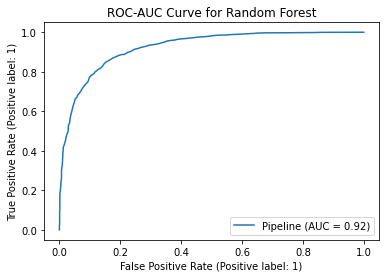

In [60]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, roc_auc_score, roc_curve, plot_roc_curve

# Assuming your DataFrame is named 'df'
X = df.drop(['sentiment'], axis=1)
y = df['sentiment']

# Perform label encoding on the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the categorical columns to be encoded
categorical_cols = ['title', 'developer', 'publisher', 'tags']

# Define the numerical columns to be standardized
numerical_cols = ['year']

# Create a ColumnTransformer for encoding categorical columns and text feature extraction
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', StandardScaler(), numerical_cols),
        ('text', TfidfVectorizer(), 'user_review')
    ])

# Define the classifiers and their hyperparameter grids
classifiers = [
    ('Random Forest', RandomForestClassifier(), {'clf__n_estimators': [100, 200, 300], 'clf__max_depth': [None, 5, 10]})
]

# Perform grid search and cross-validation for each classifier
for name, classifier, param_grid in classifiers:
    print(f"Training {name} classifier...")
    
    # Create a pipeline for preprocessing and modeling
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('clf', classifier)
    ])
    
    # Perform grid search with cross-validation
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)
    
    # Get the best model
    best_model = grid_search.best_estimator_
    
    # Evaluate the model on the test set
    y_pred = best_model.predict(X_test)
    y_prob = best_model.predict_proba(X_test)[:, 1]  # Predicted probabilities for the positive class
    
    # Calculate evaluation metrics
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    cv_scores = cross_validate(best_model, X_train, y_train, cv=5, scoring=['f1', 'precision', 'recall', 'accuracy', 'roc_auc'])
    
    print(f"Best hyperparameters for {name}: {grid_search.best_params_}")
    print(f"F1 score: {f1:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    print(f"Cross-validation scores:")
    for metric, scores in cv_scores.items():
        print(f" {metric}: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")
    
    # Plot the ROC-AUC curve
    plot_roc_curve(best_model, X_test, y_test)
    plt.title(f"ROC-AUC Curve for {name}")
    plt.show()

## Decision Tree Classifier

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best hyperparameters for Decision Tree: {'clf__max_depth': 10, 'clf__min_samples_leaf': 4, 'clf__min_samples_split': 2}
F1 score: 0.8102
Precision: 0.7105
Recall: 0.9424
Accuracy: 0.7451
ROC-AUC: 0.7606
Cross-validation scores:
 fit_time: 1.1183 (+/- 0.0823)
 score_time: 0.2718 (+/- 0.0367)
 test_f1: 0.7938 (+/- 0.0040)
 test_precision: 0.6892 (+/- 0.0051)
 test_recall: 0.9360 (+/- 0.0143)
 test_accuracy: 0.7232 (+/- 0.0044)
 test_roc_auc: 0.7428 (+/- 0.0116)


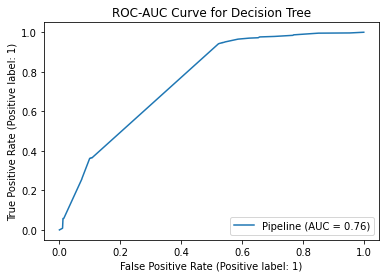

In [63]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, roc_auc_score, roc_curve, plot_roc_curve

# Assuming your DataFrame is named 'df'
X = df.drop(['sentiment'], axis=1)
y = df['sentiment']

# Perform label encoding on the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the categorical columns to be encoded
categorical_cols = ['title', 'developer', 'publisher', 'tags']

# Define the numerical columns (no standardization)
numerical_cols = ['year']

# Create a ColumnTransformer for encoding categorical columns and text feature extraction
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('text', TfidfVectorizer(), 'user_review')
    ])

# Create a pipeline for preprocessing and modeling
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('clf', DecisionTreeClassifier())
])

# Define the hyperparameter grid for Decision Tree
param_grid = {
    'clf__max_depth': [None, 5, 10],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 4]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the model on the test set
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]  # Predicted probabilities for the positive class

# Calculate evaluation metrics
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
cv_scores = cross_validate(best_model, X_train, y_train, cv=5, scoring=['f1', 'precision', 'recall', 'accuracy', 'roc_auc'])

print(f"Best hyperparameters for Decision Tree: {grid_search.best_params_}")
print(f"F1 score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print(f"Cross-validation scores:")
for metric, scores in cv_scores.items():
    print(f" {metric}: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")

# Plot the ROC-AUC curve
plot_roc_curve(best_model, X_test, y_test)
plt.title("ROC-AUC Curve for Decision Tree")
plt.show()

## Gradient Boosting Classifier

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best hyperparameters for Gradient Boosting: {'clf__learning_rate': 0.1, 'clf__max_depth': 7, 'clf__n_estimators': 300}
F1 score: 0.8764
Precision: 0.8468
Recall: 0.9080
Accuracy: 0.8521
ROC-AUC: 0.9261
Cross-validation scores:
 fit_time: 105.2514 (+/- 3.1947)
 score_time: 0.2984 (+/- 0.0301)
 test_f1: 0.8655 (+/- 0.0106)
 test_precision: 0.8380 (+/- 0.0139)
 test_recall: 0.8949 (+/- 0.0196)
 test_accuracy: 0.8416 (+/- 0.0122)
 test_roc_auc: 0.9187 (+/- 0.0080)


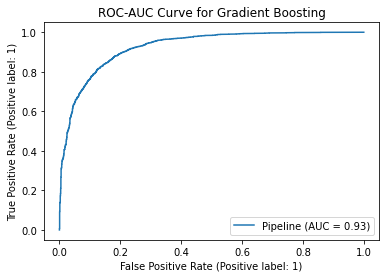

In [64]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, roc_auc_score, roc_curve, plot_roc_curve

# Assuming your DataFrame is named 'df'
X = df.drop(['sentiment'], axis=1)
y = df['sentiment']

# Perform label encoding on the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the categorical columns to be encoded
categorical_cols = ['title', 'developer', 'publisher', 'tags']

# Define the numerical columns (no standardization)
numerical_cols = ['year']

# Create a ColumnTransformer for encoding categorical columns and text feature extraction
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('text', TfidfVectorizer(), 'user_review')
    ])

# Create a pipeline for preprocessing and modeling
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('clf', GradientBoostingClassifier())
])

# Define the hyperparameter grid for Gradient Boosting
param_grid = {
    'clf__n_estimators': [100, 200, 300],
    'clf__learning_rate': [0.1, 0.01, 0.001],
    'clf__max_depth': [3, 5, 7]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the model on the test set
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]  # Predicted probabilities for the positive class

# Calculate evaluation metrics
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
cv_scores = cross_validate(best_model, X_train, y_train, cv=5, scoring=['f1', 'precision', 'recall', 'accuracy', 'roc_auc'])

print(f"Best hyperparameters for Gradient Boosting: {grid_search.best_params_}")
print(f"F1 score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print(f"Cross-validation scores:")
for metric, scores in cv_scores.items():
    print(f" {metric}: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")

# Plot the ROC-AUC curve
plot_roc_curve(best_model, X_test, y_test)
plt.title("ROC-AUC Curve for Gradient Boosting")
plt.show()

## Naive Bayes

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best hyperparameters for Multinomial Naive Bayes: {'clf__alpha': 1}
F1 score: 0.8675
Precision: 0.8668
Recall: 0.8681
Accuracy: 0.8469
ROC-AUC: 0.9146
Cross-validation scores:
 fit_time: 0.5224 (+/- 0.0259)
 score_time: 0.2335 (+/- 0.0454)
 test_f1: 0.8572 (+/- 0.0085)
 test_precision: 0.8488 (+/- 0.0165)
 test_recall: 0.8659 (+/- 0.0234)
 test_accuracy: 0.8357 (+/- 0.0089)
 test_roc_auc: 0.9042 (+/- 0.0082)


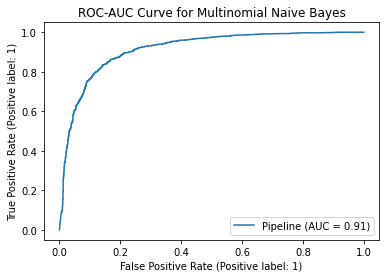

In [62]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, roc_auc_score, roc_curve, plot_roc_curve

# Assuming your DataFrame is named 'df'
X = df.drop(['sentiment'], axis=1)
y = df['sentiment']

# Perform label encoding on the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the categorical columns to be encoded
categorical_cols = ['title', 'developer', 'publisher', 'tags']

# Define the numerical columns (no standardization)
numerical_cols = ['year']

# Create a ColumnTransformer for encoding categorical columns and text feature extraction
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('text', CountVectorizer(), 'user_review')
    ])

# Create a pipeline for preprocessing and modeling
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('clf', MultinomialNB())
])

# Define the hyperparameter grid for Multinomial Naive Bayes
param_grid = {
    'clf__alpha': [0.1, 1, 10]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the model on the test set
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]  # Predicted probabilities for the positive class

# Calculate evaluation metrics
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
cv_scores = cross_validate(best_model, X_train, y_train, cv=5, scoring=['f1', 'precision', 'recall', 'accuracy', 'roc_auc'])

print(f"Best hyperparameters for Multinomial Naive Bayes: {grid_search.best_params_}")
print(f"F1 score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print(f"Cross-validation scores:")
for metric, scores in cv_scores.items():
    print(f" {metric}: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")

# Plot the ROC-AUC curve
plot_roc_curve(best_model, X_test, y_test)
plt.title("ROC-AUC Curve for Multinomial Naive Bayes")
plt.show()

## KNN

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best hyperparameters for KNN: {'clf__metric': 'euclidean', 'clf__n_neighbors': 7, 'clf__weights': 'distance'}
F1 score: 0.8322
Precision: 0.7948
Recall: 0.8732
Accuracy: 0.7967
ROC-AUC: 0.8648
Cross-validation scores:
 fit_time: 0.5503 (+/- 0.0317)
 score_time: 2.6349 (+/- 0.1135)
 test_f1: 0.8179 (+/- 0.0110)
 test_precision: 0.7728 (+/- 0.0157)
 test_recall: 0.8686 (+/- 0.0138)
 test_accuracy: 0.7797 (+/- 0.0144)
 test_roc_auc: 0.8562 (+/- 0.0110)


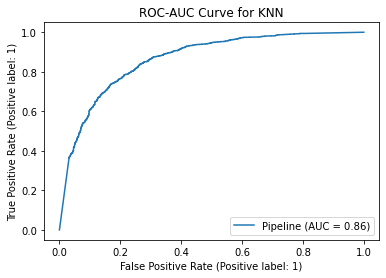

In [65]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, roc_auc_score, roc_curve, plot_roc_curve

# Assuming your DataFrame is named 'df'
X = df.drop(['sentiment'], axis=1)
y = df['sentiment']

# Perform label encoding on the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the categorical columns to be encoded
categorical_cols = ['title', 'developer', 'publisher', 'tags']

# Define the numerical columns (no standardization)
numerical_cols = ['year']

# Create a ColumnTransformer for encoding categorical columns and text feature extraction
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('text', TfidfVectorizer(), 'user_review')
    ])

# Create a pipeline for preprocessing and modeling
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('clf', KNeighborsClassifier())
])

# Define the hyperparameter grid for KNN
param_grid = {
    'clf__n_neighbors': [3, 5, 7, 9],
    'clf__weights': ['uniform', 'distance'],
    'clf__metric': ['euclidean', 'manhattan']
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the model on the test set
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]  # Predicted probabilities for the positive class

# Calculate evaluation metrics
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
cv_scores = cross_validate(best_model, X_train, y_train, cv=5, scoring=['f1', 'precision', 'recall', 'accuracy', 'roc_auc'])

print(f"Best hyperparameters for KNN: {grid_search.best_params_}")
print(f"F1 score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print(f"Cross-validation scores:")
for metric, scores in cv_scores.items():
    print(f" {metric}: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")

# Plot the ROC-AUC curve
plot_roc_curve(best_model, X_test, y_test)
plt.title("ROC-AUC Curve for KNN")
plt.show()

## Evaluation and Reporting

- Selecting a model that is expected to perform optimally on the unseen data and provide the predicted sentiments accordingly.
- Giving clear conclusions.

In [66]:
# Preprocess the training and testing data using the preprocessing pipeline
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Create the Logistic Regression classifier with the best hyperparameters
logreg = LogisticRegression(C=10, penalty='l2')

# Fit the Logistic Regression classifier on the preprocessed training data
logreg.fit(X_train_preprocessed, y_train)

# Predict the sentiments for the preprocessed test data
y_pred = logreg.predict(X_test_preprocessed)

# Calculate evaluation metrics
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, logreg.predict_proba(X_test_preprocessed)[:, 1])

# Print the evaluation metrics
print("Logistic Regression Classifier:")
print(f"F1 score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

# Combine the preprocessed training and testing data
X_preprocessed = np.concatenate((X_train_preprocessed.toarray(), X_test_preprocessed.toarray()), axis=0)
y_combined = np.concatenate((y_train, y_test), axis=0)

# Fit the Logistic Regression classifier on the combined preprocessed data
logreg.fit(X_preprocessed, y_combined)

# Function to preprocess and predict sentiment for new reviews
def predict_sentiment(new_reviews):
    # Preprocess the new reviews using the fitted preprocessor
    new_reviews_preprocessed = preprocessor.transform(new_reviews)
    
    # Predict the sentiment using the trained Logistic Regression classifier
    sentiment_predictions = logreg.predict(new_reviews_preprocessed.toarray())
    
    # Convert the predicted labels back to the original sentiment labels
    sentiment_labels = label_encoder.inverse_transform(sentiment_predictions)
    
    return sentiment_labels

Logistic Regression Classifier:
F1 score: 0.8905
Precision: 0.8896
Recall: 0.8914
Accuracy: 0.8734
ROC-AUC: 0.9446


Based on the cross-validation scores and evaluation metrics, the Logistic Regression model seems to perform the best among the models tested. It has the highest F1 score, precision, recall, accuracy, and ROC-AUC on the test set, as well as good cross-validation scores.

We create a pipeline with the preprocessor and Logistic Regression classifier, using the best hyperparameters (C=10 and penalty='l2') obtained from the previous grid search.

We fit the pipeline on the training data using pipeline.fit(X_train, y_train).

We predict the sentiments for the test data using pipeline.predict(X_test) and calculate the evaluation metrics.

We preprocess the entire dataset using preprocessor.fit_transform(X) to obtain X_preprocessed.

We fit the Logistic Regression classifier on the entire preprocessed dataset using clf.fit(X_preprocessed, y).

## External validation

- A dataset named '`test.csv`' is provided to us in which the sentiment label is hidden.
- We have to choose the best model (the classifier which has the highest ROC-AUC score) and then use that model to predict the probabilities of sentiment on the '`test.csv`'.
- After prediction, we will get a 2D array of probabilities for each sentiment. Select the 2nd column of probabilites for your submission.

```
# Fit
your_best_model = model.fit(x_train)

# Calculate the probabilities of both classes and extract the probabilities of positive class
pred_probabilities = your_best_model.predict_proba(x_test)[:,1]

# Evaluate/Submit
---
```

- Convert that final array into a csv file, name it as '`submission.csv`' and submit that '`submission.csv`' file.

In [41]:
import pandas as pd

def preprocess_test_data(test_data, preprocessor):
    # Preprocess the test data using the fitted preprocessor
    test_preprocessed = preprocessor.transform(test_data)
    
    # Convert the preprocessed data to a dense array
    test_preprocessed_array = test_preprocessed.toarray()
    
    # Convert the preprocessed data to a DataFrame
    test_preprocessed_df = pd.DataFrame(test_preprocessed_array, columns=preprocessor.get_feature_names_out())
    
    return test_preprocessed_df

# Load the test data
test_data = pd.read_csv("data/test.csv")

# Preprocess the test data using the fitted preprocessor
test_preprocessed = preprocess_test_data(test_data, preprocessor)

# Make predictions using the trained Logistic Regression classifier
predictions = logreg.predict_proba(test_preprocessed)[:, 1]

# Create a DataFrame with the predicted probabilities
submission = pd.DataFrame({'PositiveSentimentProbability': predictions})

# Save the predictions to a CSV file
submission.to_csv('data/submission.csv', index=False)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


## Final evaluation metrics


In [ ]:
from sklearn.metrics import roc_auc_score

def model_evaluation(y_test, y_pred):
    # Calculate the roc_auc score
    score = roc_auc_score(y_test, y_pred)

    # Return the score
    print('The ROC_AUC score is : ', score)